## This is a basic demo of going from data to a network using the functions in utilities.py

The outputs of each cell has been left so you can view what the outputs look like. Feel free to rerun the cells though!

In [1]:
# You must inlcude and run this code in any notebook
%run -i ../src/utilities.py

In [2]:
# Run this function as is to view the available data
view_data_toc()

,Process,Condition,Sampling Frequency,Sampling Duration,Dataset,Type,PMID
Organism,,,,,,,
Saccharomyces cerevisiae,Cell Cycle,Wild-type replicate 1,16 min,254 min,Scerevisiae_WT_r1_Microarray,Microarray,18463633
Saccharomyces cerevisiae,Cell Cycle,Wild-type replicate 2,16 min,262 min,Scerevisiae_WT_r2_Microarray,Microarray,18463633
Saccharomyces cerevisiae,Cell Cycle,Wild-type,5 min,245 min,Scerevisiae_RNAseq,RNAseq,27918582
Saccharomyces cerevisiae,Cell Cycle,No APC activity replicate 1,20 min,300 min,Scerevisiae_noAPC_r1,Microarray,25200947
Saccharomyces cerevisiae,Cell Cycle,No APC activity replicate 2,20 min,360 min,Scerevisiae_noAPC_r2,Microarray,25200947
Saccharomyces cerevisiae,Cell Cycle,No cyclin-CDK activity replicate 1,16 min,262 min,Scerevisiae_noCDK_r1,Microarray,18463633
Saccharomyces cerevisiae,Cell Cycle,No cyclin-CDK activity replicate 2,16 min,254 min,Scerevisiae_noCDK_r2,Microarray,18463633
Saccharomyces cerevisiae,Cell Cycle,DNA Damage Checkpoint activated replicate 1,Uneven,260 min,Scerevisiae_DRC_r1,Microarray,25200947
Saccharomyces cerevisiae,Cell Cycle,DNA Damage Checkpoint activated replicate 2,Uneven,260 min,Scerevisiae_DRC_r2,Microarray,25200947


### Loading data in and how to check and handle duplicate gene names

In [3]:
# This function loads a dataset into a datafame. The dataset name is taken from the "Dataset" column of the Dataset Table of Contents (printed above ^^)
data_df = load_dataset('Scerevisiae_WT1_Microarray')
data_df.head() # <-- adding .head() allows you to view the top few rows of a dataframe

,30,46,62,78,94,110,126,142,158,174,190,206,222,238,254
time_points,,,,,,,,,,,,,,,
FOX2,3176.837656,1839.948678,1248.714962,896.914709,861.681282,918.854521,925.588921,927.705403,968.911059,1032.305135,982.675859,987.949172,940.685429,957.905302,1009.043208
YDL157C,2758.241870,3513.795607,5066.365684,6996.471392,8107.569571,7977.403961,6381.621673,5044.680303,5041.913622,6031.505741,6498.590873,6459.858522,6163.031609,5978.819127,5792.091678
PCL6,1658.280545,891.561505,961.179614,898.165328,888.969974,931.729315,1057.853377,1165.162685,1234.892702,1166.776615,1103.191922,1075.442704,1222.253716,1173.119347,1235.258111
PKP2,893.195718,375.650229,259.013841,271.887341,316.900588,317.933060,354.225045,406.931381,435.892101,359.524322,373.124800,379.755595,348.730460,407.141179,372.555663
PHO8,2377.729994,1459.913001,1150.910362,2012.029694,2687.383431,2224.502378,1903.953327,2048.862330,2608.718570,2992.434776,2837.817869,2542.630140,2753.913194,2981.628434,3426.344393


In [4]:
# Use this function on your dataframe to see if the data contains any duplicate gene names. Having duplicate gene names will cause headaches later in your analyses.
duplicate_check(data_df)

This dataset has duplicate gene names. This needs to be corrected.
You can either drop duplicates or relabel duplicates.
-- Use remove_duplicates() to only keep the duplicate with either the highest gene expression at any time point or highest average gene expression.
-- Use relabel_duplicates() to append "dupN" to each duplicate gene name, where N is an integer.


False

In [5]:
# I am choosing to remove duplicates by only keeping the duplicate with the highest max gene expression.
data_nodups_df = remove_duplicates(data_df, 'max')

In [8]:
# No duplicates!
duplicate_check(data_nodups_df)

This dataset has no duplicate gene names.


True

### Running periodicity algorithms on a dataset

In [9]:
# For demo purposes, I am reducing the amount of genes I will analyze as some algorithms take awhile to run depending on the number of genes being analyzed.
demo_df = data_nodups_df.loc[['SWI4','NRM1', 'MCM1', 'YOX1', 'FOX2', 'PLM2', 'DAT1', 'FOL2', 'SWI5', 'ACE2', 'PDH1', 'ACT1', 'NDE2'],:]

In [12]:
# I will run all the periodicity algorithms on the demo dataframe. For this yeast cell cycle dataset, I think the actual cell cycle period is between 75 minutes and 100 minutes
# so I will set the minimum period to 75 and the maximum period to 100. I want test periods between these two at five minute intervals so I will set the period step to 5. 
# I also think the average period is around 95 minutes so I will set the average period as such. Since I am using yeast microarry data and this is a demo, I want my results to contain
# this information so I set filename to 'yeast_ma_demo'. This name will be used in the naming of results file and directory names. You can use anything you like.
pyjtk_results, pydl_results, ls_results = run_periodicity(demo_df, 75, 100, 5, 95, 'yeast_ma_demo', return_results=False)

Running periodicity algorithms
Running pyJTK
-- Running pyJTK on dataset, testing period(s) of 75 80 85 90 95 100
-- Command used: python ../src/pyjtk/pyjtk.py ../tmp/yeast_ma_demo__20211006174423.tsv -T 75 80 85 90 95 100 -o ../results/yeast_ma_demo__20211006174423_pyjtk_p75-100s5.tsv
-- Results saved as yeast_ma_demo__20211006174423_pyjtk_p75-100s5.tsv in the results directory
Running pyDL
-- Running pyDL on dataset, testing a period of 95
-- Command used: mpiexec -n 2 python ../src/pydl/pydl.py ../tmp/yeast_ma_demo__20211006174423.tsv -T 95 -o ../results/yeast_ma_demo__20211006174424_pydl_p95.tsv -r 1 -p 1 -l True -v False
-- Results saved as yeast_ma_demo__20211006174424_pydl_p95.tsv in the results directory
Running Lomb-Scargle
-- Running Lomb-Scargle on dataset, testing periods 75-100 at a frequency of 4 minutes
-- Command used: python ../src/ls/_run_ls_params.py ../tmp/yeast_ma_demo__20211006174425.tsv ../results 75 100 4 minutes
-- Results saved in yeast_ma_demo__20211006174425

**NOTE: Each periodicity algorithm can be run individually on a dataset.**

### Visualizing gene expression

Loading periodicity results


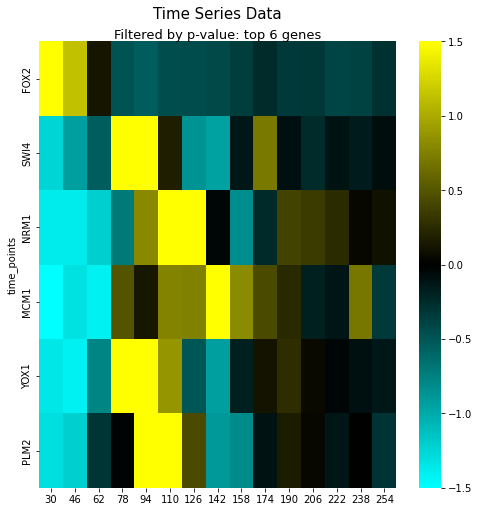

In [15]:
# I would like to view the top 6 genes that pyJTK has ranked as the most periodic in a heatmap. I want to ordered genes based on their peak expression BEFORE 96 minutes.
plot_heatmap(demo_df, pyjtk_results, 96, 'p-value', top_genes=6)

Loading periodicity results


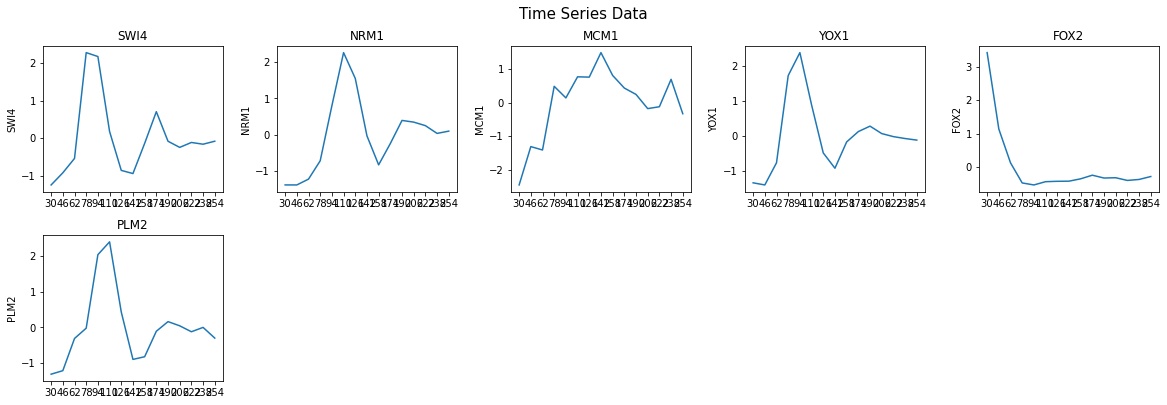

In [17]:
# I also want to inspect their gene expression profiles in a line graph.
# I just create a gene list
gene_list = get_genelist_from_top_n_genes(pyjtk_results, 'p-value', 6)
# I then supply that list, along with the dataframe, to plot the line graphs. I want to normalize the expression of each gene via z-score transformation.
plot_linegraphs_from_gene_list(demo_df, gene_list, norm_data=True)

### Applying LEMpy and visualizing networks

In [22]:
# I now want to use LEM to infer regulatory relationships between a set of regulators and targets.
# For the sake of demoing, I have created arbitrary gene lists of targets, repressors and activators.
# Note, these list can overlap in what genes they contain. That is prefectly fine.
targets_list = ['SWI4','NRM1', 'MCM1', 'YOX1', 'FOX2', 'PLM2',  'SWI5', 'ACE2', 'ACT1']
repressors_list = ['SWI4','NRM1', 'MCM1', 'YOX1']
activators_list = ['YOX1', 'FOX2', 'PLM2',  'SWI5', 'ACE2', 'ACT1']

In [24]:
# LEMpy requires a dataset, lists of targets, repressors and activators, and something to name the results. Here I used the same filename as before in the periodicity section.
all_scores_df = run_lem(demo_df, targets_list, repressors_list, activators_list, 'yeast_ma_demo')

-- Running LEMpy on dataset ../tmp/tmp_20211006175949.tsv
-- Command used: mpiexec -n 2 python ../src/lempy/lempy.py ../results/yeast_ma_demo__20211006175949_lempy/lempy_20211006175949_config.txt
-- Results saved in ../results/yeast_ma_demo__20211006175949_lempy


In [25]:
# LEMpy's output is a ranking of all the regulatory relationships (or edges) but I am only interested in the top 10 edges for building a network.
# The network produced is interactive so you can move the nodes/genes around. If you know the order of how the genes are expressed, try rearranging
# the nodes in the network in the same order!
make_top_edge_network(all_scores_df, 10)

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'style': {'content': …